# Setting

In [0]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"young917","key":"38554d8ee11a16273014fb43b7fdc0a1"}'}

In [0]:
%ls -1ha kaggle.json

kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       2393           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      18350           False  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       4543            True  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        316           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       2743            True  
competitive-data-science-predict-future-sales     2020-12-31 23:59:00  Playground           Kudos       6316   

In [0]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 55.0MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 23.7MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 63.6MB/s]


# Data Analysis

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 200)
import spacy

plt.rcParams["figure.figsize"] = (15,5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [0]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

train_without_label = train.drop('target', axis=1)
traintest = pd.concat([train_without_label,test])

print("[shape] train, test, train + test\n")
print(train.shape, test.shape, traintest.shape)

[shape] train, test, train + test

(7613, 5) (3263, 4) (10876, 4)


In [0]:
print("[sample data] train\n")
train.sample(n=10)

[sample data] train



,id,keyword,location,text,target
358,516,army,NaN,One Direction Is my pick for http://t.co/q2eBlOKeVE Fan Army #Directioners http://t.co/eNCmhz6y34 x1392,1
4965,7076,meltdown,NaN,http://t.co/HFqlwo1kMy E-Mini SP 500: Earnings letdown equals market meltdown! http://t.co/LEi9dWVllq #Amazon,0
4533,6446,injured,Kolkata,Terrorists attack police post; 2 SPOs injured http://t.co/lXMdiseUCn #YUG,1
6296,8996,stretcher,Taylor Swift,@Stretcher @invalid @Grazed @Rexyy @Towel I see the programme (:,0
5325,7603,pandemonium,Scotland,@J3Lyon I'm going to put the FFVII ones out at the weekend so I think Pandemonium! (Don't forget the exclamation mark) would be midweek.,0
3477,4972,explosion,NaN,GAElite 0 Explosion Greg 2 [Top 3rd] [0 Out] [0 balls] [0 strikes] ... No one on [P: #16 Morgan Orchard] [B: ],1
2141,3073,deaths,Does it really matter!,Deaths 7 http://t.co/xRJA0XpL40,1
5233,7479,obliteration,Federal Capital Territory,Alhaji Putin is far from being a good person sha. At least I had front row seat to his complete obliteration of Ibeto cement a competitor.,0
4740,6742,lava,USA,Check This Deal : http://t.co/uOoYgBb6aZ Sivan Health and Fitness Basalt Lava Hot Stone Massage Kit with 36 PieceÛ_ http://t.co/JJxcnwBp15,0
4262,6056,heat%20wave,NaN,It's a heat wave. #Squad #RevItUp #PizzaRev http://t.co/bp8bm8xSXw,1


In [0]:
print("[Null Data] train\n")
train.isnull().sum(),
print("[Null Data] test\n")
test.isnull().sum()

[null data] train



id          0   
keyword     61  
location    2533
text        0   
target      0   
dtype: int64

In [0]:
dup_tweets = train[train.duplicated(['text'], keep = False)].sort_values('text')
print('[Total duplicates]',dup_tweets.shape[0],'\n[Total unique]',dup_tweets['text'].nunique(dropna = False))
dup_tweets.head(10)

[Total duplicates] 179 
[Total unique] 69


,id,keyword,location,text,target
4290,6094,hellfire,"Jubail IC, Saudi Arabia.",#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,0
4299,6105,hellfire,?????? ??? ?????? ????????,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,0
4312,6123,hellfire,?????? ???? ??????,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,1
6363,9095,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6373,9107,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6377,9113,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6378,9114,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6392,9135,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6366,9098,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
2828,4064,displaced,NaN,#KCA #VoteJKT48ID 12News: UPDATE: A family of 3 has been displaced after fired damaged housed near 90th and Osborn. Fire extinguished no iÛ_,1


### Observation

#### 1. shape는 (7613, 5) (3263, 4) (10876, 4)
> target 제외하고 twitter 하나당 id, keyword, location, text를 가지고 있다.

#### 2. text:
> http나 @ 등도 포함하고 있기에 정제하는 작업이 필요할 것 같다.

#### 3. keyword:
> random하게 살펴본 데이터로는 알맞은 데이터가 들어가 있는 것으로 보인다. 또한 비어있는 경우도 61가지 밖에 없기 때문에 이를 training에 이용하면 좋겠다는 생각이 든다.

#### 4. location:
> Taylor Swift, Does it really matter! 등 알맞지 않은 데이터도 존재하기 때문에 사용하지 않거나 정제하는 작업이 필요할 것으로 보인다.

####5. target:
> 생각했던 것과 다르게, 같은 text이지만 다른 target을 갖은 데이터도 train에 포함되어있음을 확인할 수 있었다.

In [0]:
data = train
a = data.groupby(['keyword', 'target']).size().unstack(fill_value=0)
a['fraction'] = a[1] / (a[0] + a[1])
a = a.sort_values(by=[1], axis=0, ascending=False)
a[:30]

target,0,1,fraction
keyword,,,
NA,19,42,0.688525
wreckage,0,39,1.000000
derailment,0,39,1.000000
outbreak,1,39,0.975000
debris,0,37,1.000000
typhoon,1,37,0.973684
oil%20spill,1,37,0.973684
suicide%20bomb,3,32,0.914286
evacuated,4,32,0.888889


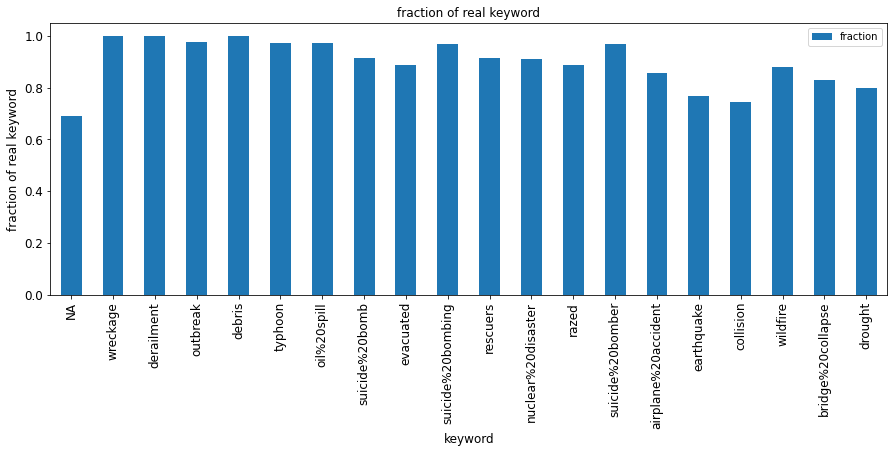

In [0]:
ax = a['fraction'][:20].plot(kind='bar', title ="fraction of real keyword", figsize=(15, 5), legend=True, fontsize=12)
ax.set_xlabel("keyword", fontsize=12)
ax.set_ylabel("fraction of real keyword", fontsize=12)
plt.show()

### Observation

##### target = 1인 데이터 중 가장 많이 나타난 keyword 순으로 (target = 1에 나타난 횟수 / target = 0에 나타난 횟수) 를 살펴보았을 때, 모두 0.6 ~ 1.0 사이의 값을 보이는 것을 알 수 있었다. 따라서 keyword가 유의미한 데이터가 될 수 있음을 파악할 수 있었다.

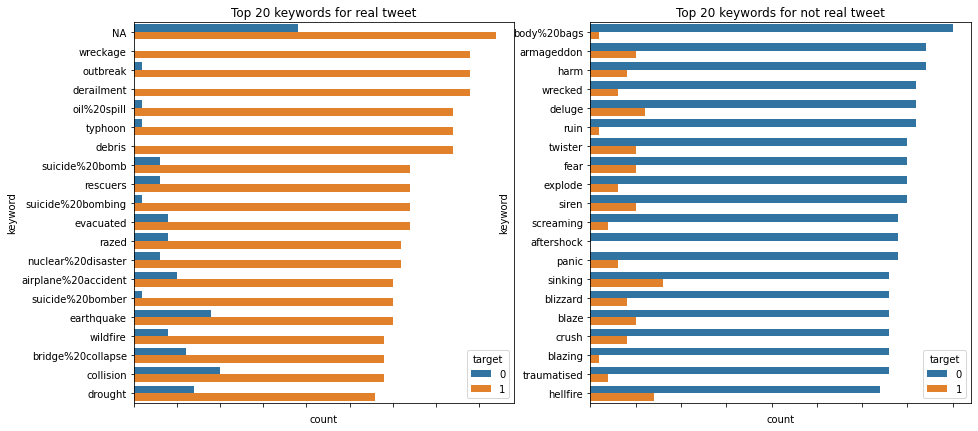

In [0]:
# top 20 keyword frequency in real and not real disaster tweets
train['keyword'] = train['keyword'].fillna('NA')
real = train[train['target'] == 1]
noreal = train[train['target'] == 0]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))
sns.countplot(y='keyword',hue = 'target', data = train, order = real['keyword'].value_counts()[:20].index, ax= ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Top 20 keywords for real tweet')
sns.countplot(y='keyword',hue = 'target', data = train, order = noreal['keyword'].value_counts()[:20].index, ax= ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Top 20 keywords for not real tweet')
print()

## Fixing Data

In [0]:
# remove http
train['text'] = train['text'].str.replace(r'https?://\S*','', regex=True)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

# It performs lemmatization, lowering case, stop word removal in text column and create bag of words data frame
parser = spacy.load('en_core_web_lg')

stop_words = spacy.lang.en.stop_words.STOP_WORDS

def spacy_tokenizer(sentence):
    tokens = parser(sentence)
    
    tokens = [tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
    
    tokens = [ tok for tok in tokens if tok not in stop_words]
    
    return tokens


tf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer,analyzer = 'word', ngram_range = (1,1))

X = tf_vector.fit_transform(train['text'])
features = tf_vector.get_feature_names()

bow_df = pd.DataFrame(columns = features, data = X.toarray())
print(bow_df.shape)
bow_df.head()

In [0]:
# Creating Final Data Frame

train.reset_index(inplace=True, drop = True)
y = train['target'] 
train.drop(['target','text'],axis = 1, inplace = True)
train = pd.concat([train,bow_df], axis =1)
print(train.shape)
train.head()

In [0]:
# Label Encodeing and compressing sparse matrix for faster execution 

from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder

lekw = LabelEncoder()
lekw.fit(train['keyword'])
train['keyword'] = lekw.transform(train['keyword'])

leemo = LabelEncoder()
leemo.fit_transform(train['emoji'])
train['emoji'] = leemo.transform(train['emoji'])

print(train.columns)
X = csr_matrix(train.values)

print(X.shape, y.shape)